# TEAM-1: Shrey, Tannavi, Gautam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# from google.colab import files
# uploaded = files.upload()
# data1=pd.read_csv(io.BytesIO(uploaded['Train.csv']))
# test1=pd.read_csv(io.BytesIO(uploaded['Test.csv']))

# Reading and analysing dataset

In [ ]:
data=data1.copy()
test=test1.copy()
test.drop(columns=['price'],axis=1,inplace=True)
data.shape,test.shape

((13320, 9), (1480, 8))

In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [ ]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Handling 'availability' column

In [ ]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
data['availability']=np.where(data['availability'].str.contains('Ready To Move'),str(13),
                     np.where( data['availability'].str.contains('Immediate Possession'),str(14),
                        data.availability.apply(lambda x:x[3:])
                        ))
data.head()

test['availability']=np.where(test['availability'].str.contains('Ready To Move'),str(13),
                     np.where( test['availability'].str.contains('Immediate Possession'),str(14),
                        test.availability.apply(lambda x:x[3:])
                        ))

print(data['availability'].unique())

#later on we will encode the availability column
data.head()

['Dec' '13' 'May' 'Feb' 'Nov' 'Oct' 'Sep' 'Mar' 'Apr' 'Aug' 'Jun' 'Jan'
 'Jul' '14']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,13,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,13,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,13,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,13,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Handling 'size' columns

In [ ]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
data['size']=data['size'].fillna(data['size'].mode()[0])
data['size']=data['size'].str.extract('(\d+)')
data['size']=data['size'].astype('float')

test['size']=test['size'].fillna('2.0')
test['size']=test['size'].str.extract('(\d+)')
test['size']=test['size'].astype('float')

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,13,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,13,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,13,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,13,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


# Handling 'bath', 'balcony' & 'location' columns

In [ ]:
data['bath']=data['bath'].fillna(data['bath'].median())
data['balcony']=data['balcony'].fillna(data['balcony'].median())
data['location']=data['location'].fillna(data['location'].mode()[0])

test['bath']=test['bath'].fillna(data['bath'].median())
test['balcony']=test['balcony'].fillna(data['balcony'].median())
test['location']=test['location'].fillna(data['location'].mode()[0])

# Handling 'total_sqft' column

In [ ]:
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

data['total_sqft'] = data.total_sqft.str.split('-').apply(preprocess_total_sqft)
test['total_sqft'] = test.total_sqft.str.split('-').apply(preprocess_total_sqft)

# Label encoding 

In [ ]:
# from sklearn import preprocessing
# categorical_columns = ['availability','area_type','location']

# label_encoder = preprocessing.LabelEncoder() 
# for column in categorical_columns:
#     label_encoder.fit(data[column].astype(str).append(test[column].astype(str)))
#     data[column] = label_encoder.transform(data[column])
#     test[column]=label_encoder.transform(test[column])

# data.head()

# Target Encoding

In [ ]:
area_type_Encoding=data.groupby('area_type')['price'].mean()
data['area_type']=data['area_type'].map(area_type_Encoding)
test['area_type']=test['area_type'].map(area_type_Encoding)

location_Encoding=data.groupby('location')['price'].mean()
data['location']=data['location'].map(location_Encoding)
test['location']=test['location'].map(location_Encoding)

availability_Encoding=data.groupby('availability')['price'].mean()
data['availability']=data['availability'].map(availability_Encoding)
test['availability']=test['availability'].map(availability_Encoding)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,92.971757,95.154464,48.316667,2.0,Coomee,1056.0,2.0,1.0,39.07
1,208.495486,115.179137,115.015882,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,104.285498,115.179137,61.252527,3.0,NaN,1440.0,2.0,3.0,62.00
3,92.971757,115.179137,115.348261,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,92.971757,115.179137,95.630303,2.0,NaN,1200.0,2.0,1.0,51.00


# Outlier Handling in price and total_sqft

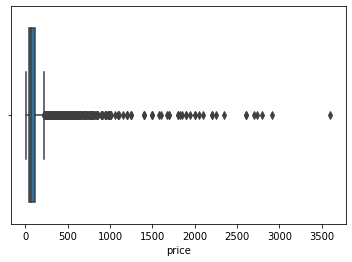

In [ ]:
sns.boxplot(x=data['price'])

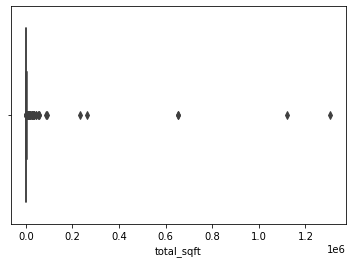

In [ ]:
sns.boxplot(x=data['total_sqft'])

In [ ]:
from scipy import stats
data['z_score_price'] = np.abs(stats.zscore(data['price']))
data['z_score_sqft']=np.abs(stats.zscore(data['total_sqft']))
data=data[data['z_score_price']<=3]
data=data[data['z_score_sqft']<=3]
data.drop(columns=['z_score_price','z_score_sqft'],axis=1,inplace=True)
data.shape

(13118, 9)

# Feature Engineering

In [ ]:
data['price']=data['price']*100000

In [ ]:
lookup=data.groupby(['location','society'])['price'].agg(['mean']).reset_index()
lookup=lookup.rename(columns={'mean':'location_society_mean'})
data=pd.merge(data,lookup,how='left',left_on=['location','society'],right_on=['location','society'])
test=pd.merge(test,lookup,how='left',left_on=['location','society'],right_on=['location','society'])
lookup

,location,society,location_society_mean
0,20.000000,Ardaseo,2000000.0
1,22.000000,Jaensa,2200000.0
2,22.890000,Rosha I,2289000.0
3,23.250000,GMown E,2325000.0
4,23.900000,AsNowre,2390000.0
...,...,...,...
2707,824.384615,Lelia M,50100000.0
2708,1068.000000,CoDast,53600000.0
2709,1093.388889,Saensar,6000000.0
2710,1167.714286,Inshath,17200000.0


In [ ]:
lookup1=data.groupby(['society','size'])['price'].agg(['mean']).reset_index()
lookup1=lookup1.rename(columns={'mean':'society_size_mean'})
data=pd.merge(data,lookup1,how='left',left_on=['size','society'],right_on=['size','society'])
test=pd.merge(test,lookup1,how='left',left_on=['size','society'],right_on=['size','society'])
lookup1

,society,size,society_size_mean
0,3Codeli,2.0,5850000.0
1,7 ise P,3.0,5000000.0
2,A idse,2.0,5000000.0
3,A rtsai,3.0,7300000.0
4,ACersd,2.0,11500000.0
...,...,...,...
3469,Zostaa,2.0,6200000.0
3470,i1ncyRe,2.0,5000000.0
3471,i1odsne,2.0,4000000.0
3472,i1rtsCo,2.0,6000000.0


In [ ]:
lookup2=data.groupby(['area_type','size'])['price'].agg(['mean']).reset_index()
lookup2=lookup2.rename(columns={'mean':'area_size_mean'})
data=pd.merge(data,lookup2,how='left',left_on=['area_type','size'],right_on=['area_type','size'])
test=pd.merge(test,lookup2,how='left',left_on=['area_type','size'],right_on=['area_type','size'])
lookup2

,area_type,size,area_size_mean
0,89.502356,1.0,4.388583e+06
1,89.502356,2.0,5.766750e+06
2,89.502356,3.0,1.056037e+07
3,89.502356,4.0,1.465714e+07
4,89.502356,5.0,2.400000e+07
5,89.502356,6.0,1.300000e+07
6,89.502356,7.0,1.000000e+07
7,89.502356,8.0,1.450000e+07
8,89.502356,9.0,5.000000e+07
9,92.971757,1.0,3.617052e+06


In [ ]:
data['price_per_sqft']=data['price']/data['total_sqft']
price_per_sqft_area_wise=data.groupby('area_type')['price_per_sqft'].mean()
data['price_per_sqft_area_wise']=data['area_type'].map(price_per_sqft_area_wise)
data.drop(['price_per_sqft'],axis=1,inplace=True)
test['price_per_sqft_area_wise']=test['area_type'].map(price_per_sqft_area_wise)

In [ ]:
data['price']=data['price']/100000

In [ ]:
data.drop(columns=['society'],axis=1,inplace=True)
test.drop(columns=['society'],axis=1,inplace=True)

In [ ]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,location_society_mean,society_size_mean,area_size_mean,price_per_sqft_area_wise
0,92.971757,95.154464,48.316667,2.0,1056.0,2.0,1.0,39.07,5.381000e+06,5.414500e+06,5.797035e+06,5575.035958
1,208.495486,115.179137,115.015882,4.0,2600.0,5.0,3.0,120.00,1.216154e+07,1.251111e+07,2.038315e+07,17873.335733
2,104.285498,115.179137,61.252527,3.0,1440.0,2.0,3.0,62.00,NaN,NaN,1.066265e+07,7214.517668
3,92.971757,115.179137,115.348261,3.0,1521.0,3.0,1.0,95.00,1.168955e+07,1.107737e+07,1.029019e+07,5575.035958
4,92.971757,115.179137,95.630303,2.0,1200.0,2.0,1.0,51.00,NaN,NaN,5.797035e+06,5575.035958


# Train Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(
    data.drop(columns=['price']), data['price'], test_size=0.2, random_state=2)

X_train.shape, X_validation.shape

((10494, 11), (2624, 11))

# Feature Selection

In [ ]:
# from sklearn.metrics import make_scorer
# def my_custom_loss_func(y_validation, y_pred):
#     return 1-np.sqrt(np.square(np.log(y_pred +1) - np.log(y_validation +1)).mean()) 
# #from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs= SFS(LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.2, max_depth=6,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=350, n_jobs=-1, num_leaves=45, objective=None,
#               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
#          k_features=(1,11),
#          forward=True,
#          floating=False,
#          verbose=2,
#          scoring=make_scorer(my_custom_loss_func),
#          cv=3
#         ).fit(X_train,y_train)

In [ ]:
# features=list(sfs.k_feature_names_)
# print(features)
features=['availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'society_size_mean', 
           'area_size_mean', 'price_per_sqft_area_wise']
# features=['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 
#          'society_size_mean', 'area_size_mean', 'price_per_sqft_area_wise']

# Training Model

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=2)#,learning_rate=0.25, n_estimators=70,max_depth=6)
xgb.fit(X_train[features],y_train)
y_pred_xgb=xgb.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_xgb +1) - np.log(y_validation +1)).mean()) 
score
#0.7519694066363458

[05:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7519694066363458

In [ ]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(random_state=2)
lgb.fit(X_train[features],y_train)
y_pred_lgb=lgb.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_lgb +1) - np.log(y_validation +1)).mean()) 
score
#0.7679147236843296

0.7679147236843296

In [ ]:
# import lightgbm
# lightgbm.plot_importance(lgb)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# def my_custom_loss_func(y_validation, y_pred):
#     return 1-np.sqrt(np.square(np.log(y_pred +1) - np.log(y_validation +1)).mean()) 

# params={
#  "learning_rate"    : [0.18,0.2,0.22,0.25] ,
# #"boosting_type"    : ['gdbt','dart'],
#  "num_leaves"       : [43,44,45,46],
#  "max_depth"        : [5,6,7],
#  "n_estimators"     : [340,350,360]
# }

# regressor=LGBMRegressor(random_state=0,boosting_type='dart')
# from sklearn.model_selection import GridSearchCV
# grid_search=GridSearchCV(regressor,param_grid=params,scoring=make_scorer(my_custom_loss_func),n_jobs=-1,cv=3,verbose=2)
# grid_search.fit(X_train[features],y_train)

In [ ]:
# print(grid_search.best_estimator_)
# lgb_tuned=grid_search.best_estimator_

# lgb_tuned=LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.2, max_depth=6,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=350, n_jobs=-1, num_leaves=45, objective=None,
#               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# lgb_tuned.fit(X_train[features],y_train)
# y_pred_lgb_tuned=lgb_tuned.predict(X_validation[features])
# score=1-np.sqrt(np.square(np.log(y_pred_lgb_tuned +1) - np.log(y_validation +1)).mean()) 
# score

In [ ]:
# lightgbm.plot_importance(lgb_tuned)

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=100,logging_level='Silent')
cat.fit(X_train[features],y_train)
y_pred_cat=cat.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_cat +1) - np.log(y_validation +1)).mean()) 
score
#0.768918168311045

0.768918168311045

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# def my_custom_loss_func(y_validation, y_pred):
#     return 1-np.sqrt(np.square(np.log(y_pred +1) - np.log(y_validation +1)).mean()) 

# params={
#  "learning_rate"    : [0.045,0.05,0.055],
#  #"depth"            : [7,8,9],
#  "iterations"       : [1200,1500,1800],
#  'l2_leaf_reg'      : [1,2],
# }

# regressor=CatBoostRegressor(random_state=0,logging_level='Silent',depth=8)
# from sklearn.model_selection import GridSearchCV
# grid_search=GridSearchCV(regressor,param_grid=params,scoring=make_scorer(my_custom_loss_func),n_jobs=-1,cv=3,verbose=2)
# grid_search.fit(X_train[features],y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  6.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f9fa956d4e0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [1200, 1500, 1800],
                         'l2_leaf_reg': [1, 2],
                         'learning_rate': [0.045, 0.05, 0.055]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(my_custom_loss_func), verbose=2)

In [ ]:
# print(grid_search.best_params_)
# cat_tuned=grid_search.best_estimator_
# #{'depth': 8, 'iterations': 1800, 'l2_leaf_reg': 2, 'learning_rate': 0.055}

{'iterations': 1200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}


In [ ]:
# cat_tuned.fit(X_train[features],y_train)
# y_pred_cat_tuned=cat_tuned.predict(X_validation[features])
# score=1-np.sqrt(np.square(np.log(y_pred_cat_tuned +1) - np.log(y_validation +1)).mean()) 
# score
# #0.7718035637510762

0.7714890147915557

In [ ]:
from sklearn.ensemble import VotingRegressor

cat_v=CatBoostRegressor(random_state=100,iterations= 1200, l2_leaf_reg= 1, learning_rate= 0.05,depth=8,
                        logging_level='Silent') 
lgb_v = LGBMRegressor(boosting_type='dart', learning_rate=0.2, max_depth=6,
              n_estimators=350, num_leaves=45, random_state=0)

vr = VotingRegressor([('cat', cat_v), ('lgb', lgb_v)])
y_pred_vr=vr.fit(X_train[features], y_train).predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_vr +1) - np.log(y_validation +1)).mean()) 
score
#0.7725651948830787

0.7746025975811551

# Final Prediction

In [ ]:
y_final_test=vr_tuned.predict(test[features])

In [ ]:
subm=pd.DataFrame({'price':y_final_test})
subm[subm['price']<0]

,price


In [ ]:
from google.colab import files
subm.to_csv('voting regressor tuned.csv',index=False) 
files.download('voting regressor tuned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>